# Notebook di Training

In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.521728e+13,5717150,F,2016-05-19T07:36:28Z,2016-05-19T00:00:00Z,64,SÃO JOSÉ,0,1,1,0,0,0,No
1,4.874299e+12,5648199,F,2016-05-02T15:12:07Z,2016-05-04T00:00:00Z,27,ILHA DE SANTA MARIA,0,0,0,0,0,0,No
2,3.896276e+13,5632220,F,2016-04-28T07:47:27Z,2016-05-13T00:00:00Z,31,DA PENHA,0,0,0,0,0,0,Yes
3,2.514865e+14,5606594,F,2016-04-20T10:28:48Z,2016-05-13T00:00:00Z,86,TABUAZEIRO,0,1,0,0,0,0,No
4,2.518672e+13,5714167,F,2016-05-18T11:22:59Z,2016-05-20T00:00:00Z,56,JABOUR,1,0,0,0,0,0,No


In [5]:
test.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,7.619228e+11,5669549,F,2016-05-06T11:05:54Z,2016-05-06T00:00:00Z,37,MARIA ORTIZ,0,0,0,0,0,0,No
1,2.424612e+13,5680976,M,2016-05-10T13:21:36Z,2016-05-12T00:00:00Z,47,SÃO CRISTÓVÃO,0,1,1,0,0,0,No
2,7.523714e+12,5690322,F,2016-05-12T09:52:58Z,2016-06-03T00:00:00Z,14,GRANDE VITÓRIA,0,0,0,0,0,1,No
3,1.241817e+14,5586697,F,2016-04-15T07:52:01Z,2016-05-06T00:00:00Z,79,REDENÇÃO,0,0,0,0,0,0,Yes
4,6.986954e+12,5709803,F,2016-05-17T14:33:25Z,2016-05-17T00:00:00Z,47,CONQUISTA,0,0,0,0,0,0,No


# 1) Analisi inziale dei dati utilizzati per il training

In [6]:
import seaborn as sns

#### Neighbourhood

,No-show
Neighbourhood,
JARDIM CAMBURI,5000
MARIA ORTIZ,3703
RESISTÊNCIA,2859
JARDIM DA PENHA,2481
ITARARÉ,2254
...,...
ILHA DO BOI,23
ILHA DO FRADE,6
AEROPORTO,6


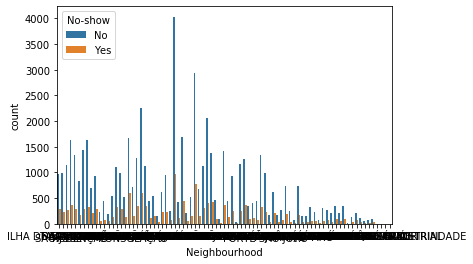

In [7]:
ax = sns.countplot(x="Neighbourhood", hue="No-show", data=train)
train[['Neighbourhood', 'No-show']].groupby(['Neighbourhood']).count().sort_values(by='No-show', ascending=False)

#### Scholarship

,No-show
Scholarship,
0,63669
1,7067


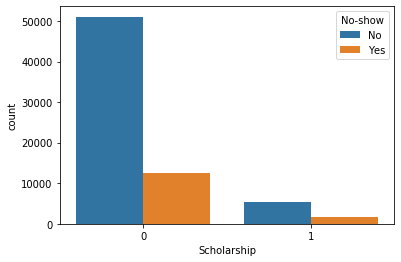

In [8]:
ax = sns.countplot(x="Scholarship", hue="No-show", data=train)
train[['Scholarship', 'No-show']].groupby(['Scholarship']).count().sort_values(by='No-show', ascending=False)

#### Hipertension

,No-show
Hipertension,
0,56660
1,14076


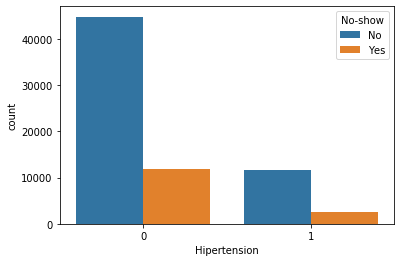

In [9]:
ax = sns.countplot(x="Hipertension", hue="No-show", data=train)
train[['Hipertension', 'No-show']].groupby(['Hipertension']).count().sort_values(by='No-show', ascending=False)

#### Diabetes

,No-show
Diabetes,
0,65643
1,5093


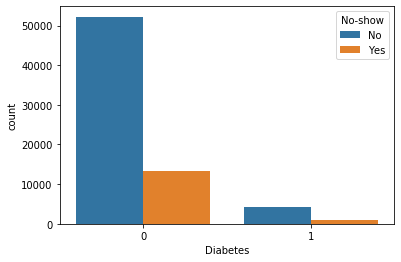

In [10]:
ax = sns.countplot(x="Diabetes", hue="No-show", data=train)
train[['Diabetes', 'No-show']].groupby(['Diabetes']).count().sort_values(by='No-show', ascending=False)

#### Alcoholism

,No-show
Alcoholism,
0,68558
1,2178


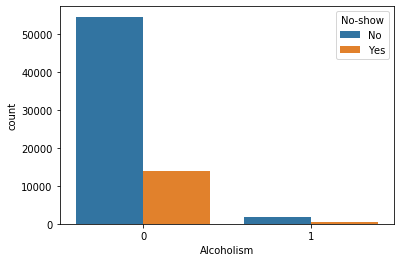

In [11]:
ax = sns.countplot(x="Alcoholism", hue="No-show", data=train)
train[['Alcoholism', 'No-show']].groupby(['Alcoholism']).count().sort_values(by='No-show', ascending=False)

#### Handcap

,No-show
Handcap,
0,69305
1,1301
2,116
3,11
4,3


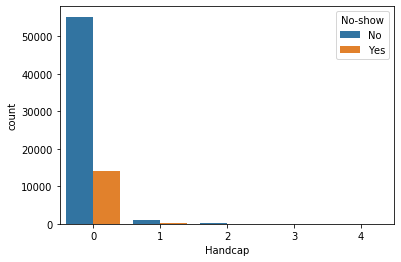

In [12]:
ax = sns.countplot(x="Handcap", hue="No-show", data=train)
train[['Handcap', 'No-show']].groupby(['Handcap']).count().sort_values(by='No-show', ascending=False)

#### SMS_received

,No-show
SMS_received,
0,47994
1,22742


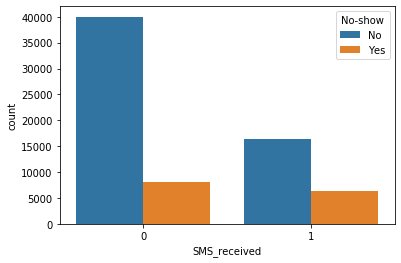

In [13]:
ax = sns.countplot(x="SMS_received", hue="No-show", data=train)
train[['SMS_received', 'No-show']].groupby(['SMS_received']).count().sort_values(by='No-show', ascending=False)

# 2) Preprocessing dei dati

In [14]:
# train e test sono le variabili che contengono i dataset
train['No-show'] = train['No-show'].replace('No', 0)
train['No-show'] = train['No-show'].replace('Yes', 1)

test['No-show'] = test['No-show'].replace('No', 0)
test['No-show'] = test['No-show'].replace('Yes', 1)

In [15]:
# Tolgo tale colonna dato che sono ID e sono unici
train = train.drop(labels=['AppointmentID'], axis=1)
test = test.drop(labels=['AppointmentID'], axis=1)

In [16]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70736 entries, 0 to 70735
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       70736 non-null  float64
 1   Gender          70736 non-null  object 
 2   ScheduledDay    70736 non-null  object 
 3   AppointmentDay  70736 non-null  object 
 4   Age             70736 non-null  int64  
 5   Neighbourhood   70736 non-null  object 
 6   Scholarship     70736 non-null  int64  
 7   Hipertension    70736 non-null  int64  
 8   Diabetes        70736 non-null  int64  
 9   Alcoholism      70736 non-null  int64  
 10  Handcap         70736 non-null  int64  
 11  SMS_received    70736 non-null  int64  
 12  No-show         70736 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 7.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17685 entries, 0 to 17684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dty

## Primo step: gestione delle features temporali

In [17]:
# Gestione per i dati di train
train['ScheduledDay'] = pd.to_datetime(train['ScheduledDay'],format='%Y-%m-%dT%H:%M:%SZ')

train['scheduled_year'] = train['ScheduledDay'].dt.year
train['scheduled_month'] = train['ScheduledDay'].dt.month
train['scheduled_day'] = train['ScheduledDay'].dt.day
train['scheduled_hour'] = train['ScheduledDay'].dt.hour
train['scheduled_minute'] = train['ScheduledDay'].dt.minute

train['AppointmentDay'] = pd.to_datetime(train['AppointmentDay'],format='%Y-%m-%dT%H:%M:%SZ')

train['appointment_year'] = train['AppointmentDay'].dt.year
train['appointment_month'] = train['AppointmentDay'].dt.month
train['appointment_day'] = train['AppointmentDay'].dt.day

train = train.drop(labels=['ScheduledDay', 'AppointmentDay'], axis=1)
train

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_year,scheduled_month,scheduled_day,scheduled_hour,scheduled_minute,appointment_year,appointment_month,appointment_day
0,2.521728e+13,F,64,SÃO JOSÉ,0,1,1,0,0,0,0,2016,5,19,7,36,2016,5,19
1,4.874299e+12,F,27,ILHA DE SANTA MARIA,0,0,0,0,0,0,0,2016,5,2,15,12,2016,5,4
2,3.896276e+13,F,31,DA PENHA,0,0,0,0,0,0,1,2016,4,28,7,47,2016,5,13
3,2.514865e+14,F,86,TABUAZEIRO,0,1,0,0,0,0,0,2016,4,20,10,28,2016,5,13
4,2.518672e+13,F,56,JABOUR,1,0,0,0,0,0,0,2016,5,18,11,22,2016,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70731,1.961688e+14,M,15,JARDIM CAMBURI,0,0,0,0,0,0,0,2016,5,20,7,6,2016,5,20
70732,6.894576e+13,F,61,SÃO CRISTÓVÃO,0,1,0,0,0,0,0,2016,5,3,14,20,2016,5,5
70733,2.628813e+13,F,72,JARDIM CAMBURI,0,0,0,0,0,1,0,2016,5,16,17,21,2016,5,25
70734,2.148655e+13,M,19,CONSOLAÇÃO,0,0,0,0,0,0,1,2016,5,2,16,58,2016,5,13


In [18]:
# Gestione per i dati di test
test['ScheduledDay'] = pd.to_datetime(test['ScheduledDay'],format='%Y-%m-%dT%H:%M:%SZ')

test['scheduled_year'] = test['ScheduledDay'].dt.year
test['scheduled_month'] = test['ScheduledDay'].dt.month
test['scheduled_day'] = test['ScheduledDay'].dt.day
test['scheduled_hour'] = test['ScheduledDay'].dt.hour
test['scheduled_minute'] = test['ScheduledDay'].dt.minute

test['AppointmentDay'] = pd.to_datetime(test['AppointmentDay'],format='%Y-%m-%dT%H:%M:%SZ')

test['appointment_year'] = test['AppointmentDay'].dt.year
test['appointment_month'] = test['AppointmentDay'].dt.month
test['appointment_day'] = test['AppointmentDay'].dt.day

test = test.drop(labels=['ScheduledDay', 'AppointmentDay'], axis=1)

test

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_year,scheduled_month,scheduled_day,scheduled_hour,scheduled_minute,appointment_year,appointment_month,appointment_day
0,7.619228e+11,F,37,MARIA ORTIZ,0,0,0,0,0,0,0,2016,5,6,11,5,2016,5,6
1,2.424612e+13,M,47,SÃO CRISTÓVÃO,0,1,1,0,0,0,0,2016,5,10,13,21,2016,5,12
2,7.523714e+12,F,14,GRANDE VITÓRIA,0,0,0,0,0,1,0,2016,5,12,9,52,2016,6,3
3,1.241817e+14,F,79,REDENÇÃO,0,0,0,0,0,0,1,2016,4,15,7,52,2016,5,6
4,6.986954e+12,F,47,CONQUISTA,0,0,0,0,0,0,0,2016,5,17,14,33,2016,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,6.531344e+13,F,43,SANTA LÚCIA,0,1,1,0,0,1,0,2016,4,18,10,33,2016,5,4
17681,2.387462e+12,F,23,ROMÃO,0,0,0,0,0,0,0,2016,5,10,11,0,2016,5,17
17682,9.585297e+13,M,16,JOANA D´ARC,0,0,0,0,0,0,1,2016,5,19,13,32,2016,5,19
17683,2.869766e+12,M,62,JARDIM DA PENHA,0,1,1,0,0,0,0,2016,5,10,8,23,2016,5,10


In [19]:
# Per vedere la congruenza basta togliere i commenti e runnare la cella

# print(train.info())
# print(test.info())

## Secondo step: gestione delle variabili categoriche tramite LabelEncoder

In [20]:
s1 = (train.dtypes == 'object')
object_cols_train = list(s1[s1].index)
object_cols_train

['Gender', 'Neighbourhood']

In [21]:
s2 = (train.dtypes == 'object')
object_cols_test = list(s2[s2].index)
object_cols_test

['Gender', 'Neighbourhood']

Dato che i due insiemi sono uguali (per forza di cose) uso la stessa lista per entrambi i dataset

In [22]:
object_cols = object_cols_test

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# Gestione degli errori
# Anche se il dataset è rappresentativo per non incorrere in blocchi si gesticcono gli errori del LabelEncoder
train_copy = train.copy()
test_copy = test.copy()

label_encoder = LabelEncoder()

for col in object_cols:
    train_copy[col] = label_encoder.fit(train[col])
    test_copy[col] = test_copy[col].map(lambda s: 'OTHER' if s not in label_encoder.classes_ else s)
    label_encoder.classes_ = np.append(label_encoder.classes_, 'OTHER')
    train_copy[col] = label_encoder.transform(train[col])
    test_copy[col] = label_encoder.transform(test[col])

train = train_copy
test = test_copy

In [25]:
train

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_year,scheduled_month,scheduled_day,scheduled_hour,scheduled_minute,appointment_year,appointment_month,appointment_day
0,2.521728e+13,0,64,76,0,1,1,0,0,0,0,2016,5,19,7,36,2016,5,19
1,4.874299e+12,0,27,30,0,0,0,0,0,0,0,2016,5,2,15,12,2016,5,4
2,3.896276e+13,0,31,15,0,0,0,0,0,0,1,2016,4,28,7,47,2016,5,13
3,2.514865e+14,0,86,78,0,1,0,0,0,0,0,2016,4,20,10,28,2016,5,13
4,2.518672e+13,0,56,37,1,0,0,0,0,0,0,2016,5,18,11,22,2016,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70731,1.961688e+14,1,15,38,0,0,0,0,0,0,0,2016,5,20,7,6,2016,5,20
70732,6.894576e+13,0,61,75,0,1,0,0,0,0,0,2016,5,3,14,20,2016,5,5
70733,2.628813e+13,0,72,38,0,0,0,0,0,1,0,2016,5,16,17,21,2016,5,25
70734,2.148655e+13,1,19,13,0,0,0,0,0,0,1,2016,5,2,16,58,2016,5,13


In [26]:
test

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_year,scheduled_month,scheduled_day,scheduled_hour,scheduled_minute,appointment_year,appointment_month,appointment_day
0,7.619228e+11,0,37,43,0,0,0,0,0,0,0,2016,5,6,11,5,2016,5,6
1,2.424612e+13,1,47,75,0,1,1,0,0,0,0,2016,5,10,13,21,2016,5,12
2,7.523714e+12,0,14,26,0,0,0,0,0,1,0,2016,5,12,9,52,2016,6,3
3,1.241817e+14,0,79,57,0,0,0,0,0,0,1,2016,4,15,7,52,2016,5,6
4,6.986954e+12,0,47,12,0,0,0,0,0,0,0,2016,5,17,14,33,2016,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,6.531344e+13,0,43,65,0,1,1,0,0,1,0,2016,4,18,10,33,2016,5,4
17681,2.387462e+12,0,23,60,0,0,0,0,0,0,0,2016,5,10,11,0,2016,5,17
17682,9.585297e+13,1,16,41,0,0,0,0,0,0,1,2016,5,19,13,32,2016,5,19
17683,2.869766e+12,1,62,39,0,1,1,0,0,0,0,2016,5,10,8,23,2016,5,10


In [27]:
# Controllo ulteriormente la presenza di valori nulli
print(train.isnull().sum(axis = 0))
print(test.isnull().sum(axis = 0))

PatientId            0
Gender               0
Age                  0
Neighbourhood        0
Scholarship          0
Hipertension         0
Diabetes             0
Alcoholism           0
Handcap              0
SMS_received         0
No-show              0
scheduled_year       0
scheduled_month      0
scheduled_day        0
scheduled_hour       0
scheduled_minute     0
appointment_year     0
appointment_month    0
appointment_day      0
dtype: int64
PatientId            0
Gender               0
Age                  0
Neighbourhood        0
Scholarship          0
Hipertension         0
Diabetes             0
Alcoholism           0
Handcap              0
SMS_received         0
No-show              0
scheduled_year       0
scheduled_month      0
scheduled_day        0
scheduled_hour       0
scheduled_minute     0
appointment_year     0
appointment_month    0
appointment_day      0
dtype: int64


## Terzo Step: Feature Selection

- La prima considerazione che si puo' fare e' che le malattie sono "importanti": una persona va dal medico ed effettua le visite anche in relazione alle malattie che ha. Quindi le lascio inalterate
- Ho lasciato anche la colonna 'PatientId' in quanto esistono persone che hanno effettuato piu' visite, e potrebbe essere indicativo
- Per quanto riguarda le features temporali: tutte fanno riferimento allo stesso anno, ma potrebbe accadere che nel test set ci siano anche altri anni, inoltre non incide sull'accuracy quindi non si toglie. Al contrario si tolgono le colonne riguardanti le ore e i minuti
- E' di per sé molto importante il fatto di avere o meno la polizza assicurativa sanitaria, quindi si lascia
- Importante anche dove si svolge l'appuntamento quindi la variabile Neighborood, da lasciare cosi' come l'età ed il fatto di aver ricevuto o meno l'SMS: possono essere indizi significativi

Detto questo, provvediamo a togliere le colonne che non ci servono da entrambi i dataset

In [28]:
to_delete = ['scheduled_hour', 'scheduled_minute']

train = train.drop(labels=to_delete, axis=1)
test = test.drop(labels=to_delete, axis=1)

In [29]:
train.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_year,scheduled_month,scheduled_day,appointment_year,appointment_month,appointment_day
0,2.521728e+13,0,64,76,0,1,1,0,0,0,0,2016,5,19,2016,5,19
1,4.874299e+12,0,27,30,0,0,0,0,0,0,0,2016,5,2,2016,5,4
2,3.896276e+13,0,31,15,0,0,0,0,0,0,1,2016,4,28,2016,5,13
3,2.514865e+14,0,86,78,0,1,0,0,0,0,0,2016,4,20,2016,5,13
4,2.518672e+13,0,56,37,1,0,0,0,0,0,0,2016,5,18,2016,5,20


# 3) Addestramento e Valutazione

In [30]:
y_train = train['No-show']
train_data = train.drop(labels=['No-show'], axis=1)

y_test = test['No-show']
test_data = test.drop(labels=['No-show'], axis=1)

## Prima operazione: prova con LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logistic = LogisticRegression(C=0.01)
logistic.fit(train_data, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
print("Training set score: {:.4f}".format(logistic.score(train_data, y_train)))
print("Test set score: {:.4f}".format(logistic.score(test_data, y_test)))

Training set score: 0.7973
Test set score: 0.7995


## Seconda operazione: Prova con DecisionTree

In [34]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(train_data, y_train)
print("Accuracy on training set: {:.4f}".format(tree1.score(train_data, y_train)))
print("Accuracy on test set: {:.4f}".format(tree1.score(test_data, y_test)))

Accuracy on training set: 0.9976
Accuracy on test set: 0.7192


In [35]:
tree2 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree2.fit(train_data, y_train)

print("Accuracy on training set: {:.4f}".format(tree2.score(train_data, y_train)))
print("Accuracy on test set: {:.4f}".format(tree2.score(test_data, y_test)))

Accuracy on training set: 0.7973
Accuracy on test set: 0.7995


In [36]:
# Prova con una batteria di DecisionTree al variare del parametro max_depth
tree_test_results = []
tree_train_results = []

for i in range(2,16):
    tree = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree.fit(train_data, y_train)
    tree_train_results.append(tree.score(train_data, y_train))
    tree_test_results.append(tree.score(test_data, y_test))

In [37]:
tree_train_results

[0.7973167835331373,
 0.7973167835331373,
 0.7973167835331373,
 0.7973733318253788,
 0.7975429767021036,
 0.7983063786473649,
 0.799677674734223,
 0.8020668400814296,
 0.806647251752997,
 0.812429314634698,
 0.8203460755485185,
 0.8295775842569555,
 0.8408589685591495,
 0.8535399230943226]

In [38]:
tree_test_results

[0.7995476392422958,
 0.7995476392422958,
 0.7995476392422958,
 0.7990952784845915,
 0.7994910941475827,
 0.7988125530110263,
 0.7975120158326265,
 0.7957591178965224,
 0.7923664122137405,
 0.7903873338987842,
 0.7852982753746113,
 0.7800395815662992,
 0.7776081424936386,
 0.7704834605597964]

In [39]:
best_tree = DecisionTreeClassifier(max_depth=4, random_state=0)
best_tree.fit(train_data, y_train)

print("Accuracy on training set: {:.4f}".format(best_tree.score(train_data, y_train)))
print("Accuracy on test set: {:.4f}".format(best_tree.score(test_data, y_test)))

Accuracy on training set: 0.7973
Accuracy on test set: 0.7995


Ho lasciato perdere la prova con k-NearestNeighbor perché non porta a dei risultati buoni.

# Scelta finale del miglior modello
Dato che i due modelli mi danno praticamente gli stessi risultati, ho optato per un DecisionTreeClassifier. Quindi, la mia scelta per poter prevedere se e quando un paziente non si presenterà alla visita medica utilizzando il test finale e' il modello espresso qui sotto

In [40]:
best_model = best_tree
best_model.fit(train_data, y_train)

pred_values = best_model.predict(test_data)

print("Accuracy on test set: {:.4f}".format(best_model.score(test_data, y_test)))

Accuracy on test set: 0.7995
